# Imports

In [73]:
import math
import inflection
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#from IPython.core.display import html
from IPython.display import Image
import datetime as dt
pd.set_option('display.max_columns', 500)

## Loading Data

In [3]:
                            # lê todo o arquivo de uma vez 
df_sales_raw = pd.read_csv("data/train.csv", low_memory=False)
df_store_raw = pd.read_csv("data/store.csv", low_memory=False)

# merge
df_raw = pd.merge(  df_sales_raw, df_store_raw, how='left', on='Store' )

In [4]:
df_raw.sample(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
126355,361,4,2015-04-09,4364,507,1,0,0,0,c,c,4490.0,5.0,2014.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
665678,809,2,2013-11-12,6822,629,1,0,0,0,a,a,12770.0,10.0,2000.0,0,NaN,NaN,NaN
528084,360,6,2014-03-15,4967,545,1,0,0,0,a,a,2040.0,6.0,2007.0,0,NaN,NaN,NaN
657486,422,2,2013-11-19,5368,475,1,1,0,0,a,c,2880.0,NaN,NaN,0,NaN,NaN,NaN
458310,831,6,2014-05-17,8932,1214,1,0,0,0,a,a,800.0,6.0,2007.0,0,NaN,NaN,NaN
590782,618,6,2014-01-18,6337,518,1,0,0,0,d,c,9910.0,NaN,NaN,0,NaN,NaN,NaN
611505,156,1,2013-12-30,8449,933,1,0,0,1,a,a,2020.0,2.0,2011.0,1,14.0,2011.0,"Mar,Jun,Sept,Dec"
965474,670,6,2013-02-16,5138,593,1,0,0,0,a,a,2060.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
996105,81,6,2013-01-19,7484,601,1,0,0,0,a,a,2370.0,3.0,2011.0,1,40.0,2014.0,"Jan,Apr,Jul,Oct"
262720,201,3,2014-12-03,5956,413,1,1,0,0,d,a,20260.0,NaN,NaN,1,18.0,2014.0,"Mar,Jun,Sept,Dec"


# PASSO 1 - Data Description

In [5]:
# Meigarom faz uma cópia a cada seção nova, pra em grandes códigos evitar sobrescrever a var
# do DS original e ter que rodar tudo de novo.
df1 = df_raw.copy()

## Rename Columns

In [6]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [7]:
#pega as colunas originais
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

In [8]:
#cria função pra transformar em snake_case
snakecase = lambda x: inflection.underscore ( x )

#aplica a função em todas as palabras de cols_old, guarda em lista na cols_new
cols_new = list( map( snakecase, cols_old ) )

#rename
df1.columns = cols_new

In [9]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

## Data Dimension

In [10]:
print (f'Number of rows: {df1.shape[0] }')
print (f'Number of rows: {df1.shape[1] }')

Number of rows: 1017209
Number of rows: 18


## Data Types

In [11]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [12]:
#convert 'date' to datetime:
df1['date'] = pd.to_datetime( df1['date'] )
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## Check NA

In [13]:
# Ver todas linhas que tem ao menos 1 NA
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### Há 3 formas de tratar:
1 - Excluir todas as linhas com NA.
     - Bom: rápido e fácil
     - Péssimo: descarta dados, pode prejudicar meu modelo
    
2 - Usar algoritmos de ML pra substituir NAs pela média, mediana, prevendo o número que seria 
através das colunas que tem valor.

3 - Descobrir porque o NA tá aqui. Pode ter trocado o sistema, antes não tinha essa coluna. Ou ainda antes era o valor de outra coluna.

## Fillout NA

Colunas com NA:
-competition_distance
-competition_open_since_month
-competition_open_since_year
-promo2_since_week
-promo2_since_year
-promo_interval

In [15]:
#competition_distance
#CompetitionDistance - distance in meters to the nearest competitor store

# Vou assumir que os que não tem valor aqui, não tem competidores perto.
# Logo, vou atribuir pras NAs um valor bem amior que o maior valor de distância existente.
df1['competition_distance'].max()

75860.0

In [16]:
#atribuindo o valor pra todas NA

df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x ) 

In [18]:
#competition_open_since_month
# CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the
# nearest competitor was opened

# Se esta coluna está vazia, ou deve ser porque não tem competidor próximo, ou porque
# não sabem quando foi aberta. 
# Vou assumir nesse primeiro ciclo então minha data de venda como a data de abertura do 
# competidor, mesmo que seja simplista.

# precisa axis aqui pois são duas colunas que estamos mexendo no lambda
df1['competition_open_since_month'] = df1.apply ( lambda x: x['date'].month 
                    if math.isnan( x['competition_open_since_month'] ) 
                    else x['competition_open_since_month'], axis=1 ) 

In [19]:
#competition_open_since_year
# CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the
# nearest competitor was opened

# Vamos fazer pro year o mesno que o feito pro month:
df1['competition_open_since_year'] = df1.apply ( lambda x: x['date'].year 
                    if math.isnan( x['competition_open_since_year'] ) 
                    else x['competition_open_since_year'], axis=1 ) 

In [20]:
#promo2_since_week

# Promo2Since[Year/Week] - describes the year and calendar week when the store started 
#    participating in Promo2
#Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not
#    participating, 1 = store is participating

# promo2_since_week: Também vamos por hora setar a partir da data de venda
df1['promo2_since_week'] = df1.apply ( lambda x: x['date'].week 
                    if math.isnan( x['promo2_since_week'] ) 
                    else x['promo2_since_week'], axis=1 )

In [21]:
#promo2_since_year: Também vamos por hora setar a partir da data de venda
df1['promo2_since_year'] = df1.apply ( lambda x: x['date'].year 
                    if math.isnan( x['promo2_since_year'] ) 
                    else x['promo2_since_year'], axis=1 )

In [22]:
#promo_interval
# PromoInterval - describes the consecutive intervals Promo2 is started, naming the months 
# the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in 
# February, May, August, November of any given year for that store

#
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 
 9: 'Sept', 10: 'Out', 11: 'Nov', 12: 'Dec' }

#preencher NA com zeros
#inplace=True pra não retornar valor, mas motificar na coluna
df1['promo_interval'].fillna(0, inplace=True)

#cria coluna 'month_map' e seta o mes nela
df1['month_map'] = df1['date'].dt.month.map( month_map )

#cria coluna 'is_promo', e seta 1 se 'month_map' estiver em 'promo_interval', senão 0.
#assim, consigo saber se naquela venda, estava ou não em promoção.
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply ( lambda x: 
      0 if x['promo_interval'] == 0 else 
      1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis =1 )

In [23]:
 df1.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
157167,1068,5,2015-03-13,3629,254,1,0,0,0,d,c,5010.0,3.0,2015.0,1,5.0,2013.0,"Jan,Apr,Jul,Oct",Mar,0
785550,261,6,2013-07-27,6047,592,1,0,0,0,d,c,15340.0,4.0,2015.0,1,39.0,2009.0,"Jan,Apr,Jul,Oct",Jul,1
359949,187,4,2014-08-21,6924,794,1,1,0,1,a,c,19360.0,8.0,2014.0,0,34.0,2014.0,0,Aug,0
870907,878,7,2013-05-12,0,0,0,0,0,0,d,c,1100.0,12.0,2014.0,0,19.0,2013.0,0,May,0
269591,581,3,2014-11-26,6989,678,1,1,0,0,a,a,7250.0,12.0,2013.0,0,48.0,2014.0,0,Nov,0


In [24]:
 df1.sample(5).T

,677203,862504,198384,595866,41742
store,69,280,1030,127,488
day_of_week,5,7,3,1,3
date,2013-11-01 00:00:00,2013-05-19 00:00:00,2015-02-04 00:00:00,2014-01-13 00:00:00,2015-06-24 00:00:00
sales,9232,0,3736,3587,2895
customers,1198,0,328,540,340
open,1,0,1,1,1
promo,0,0,1,0,0
state_holiday,0,0,0,0,0
school_holiday,0,0,1,0,0
store_type,c,d,a,d,a


In [25]:
#resolvido
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## Change Types

In [26]:
# Como fizemos alteração nas colunas, é importante conferir se não mudou o formato das colnas
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [27]:
#converter de float pra int
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype( int )
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( int )
df1['promo2_since_week'] = df1['promo2_since_week'].astype( int )
df1['promo2_since_year'] = df1['promo2_since_year'].astype( int )

In [28]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

## Descriptive Statistical

Serve para 2 coisas:
 - 1  Termos alguma noção de negócios pelos dados
 - 2  Conseguirmos detectar alguns erros (venda negativa por ex..)

Métricas de tendência central: média e mediana (resumem dados em um único número)
Metricas de dispersão: desvio padrão, min, max, range, skew, kurtosis

In [29]:
#separa colunas numéricas e categóricas, pra aplicar a estatística em cada conjunto:
num_attributes = df1.select_dtypes ( include=['int64','float64'] )
cat_attributes = df1.select_dtypes ( exclude=['int64','float64','datetime64[ns]'] )

In [30]:
num_attributes.sample(5)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
966215,296,5,5281,644,1,0,0,9580.0,5,2007,1,45,2014,1
157977,763,4,4897,496,1,0,0,32240.0,3,2010,0,11,2015,0
596615,876,1,7151,942,1,0,0,21790.0,4,2005,1,18,2015,0
560300,241,5,6250,717,1,0,0,780.0,2,2014,0,7,2014,0
724956,992,5,5140,690,1,0,0,2480.0,7,1990,0,38,2013,0


In [31]:
cat_attributes.sample(5)

,state_holiday,store_type,assortment,promo_interval,month_map
763914,0,c,a,"Jan,Apr,Jul,Oct",Aug
233812,0,a,a,"Jan,Apr,Jul,Oct",Jan
177397,0,d,c,0,Feb
998777,0,c,c,0,Jan
388576,0,a,a,0,Jul


### Numerical Attibures

In [32]:
#Métricas de tendência central: média e mediana
ct1 = pd.DataFrame ( num_attributes.apply ( np.mean ) ).T
ct2 = pd.DataFrame ( num_attributes.apply ( np.median ) ).T

#Metricas de dispersão: desvio padrão, min, max, range, skew, kurtosis
d1 = pd.DataFrame ( num_attributes.apply ( np.std ) ).T
d2 = pd.DataFrame ( num_attributes.apply ( min ) ).T
d3 = pd.DataFrame ( num_attributes.apply ( max ) ).T
d4 = pd.DataFrame ( num_attributes.apply ( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame ( num_attributes.apply ( lambda x: x.skew() ) ).T
d6 = pd.DataFrame ( num_attributes.apply ( lambda x: x.kurtosis() ) ).T

#concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index() 
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ]

In [33]:
#Análise geral:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


In [34]:
#Anlálise de SALES

#Vou retirar as vendas = 0 pra analisar o gráfico mais limpo:
df_sales_pos = df1.loc[ df1['sales'] > 0 ]

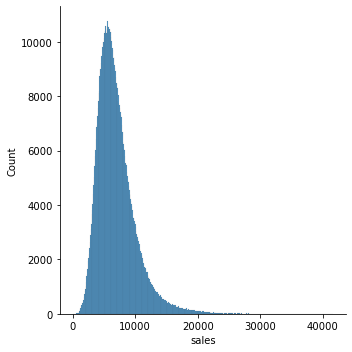

In [35]:
p = sns.displot ( df_sales_pos['sales'] )
#p.fig.set_dpi(100)
plt.show()

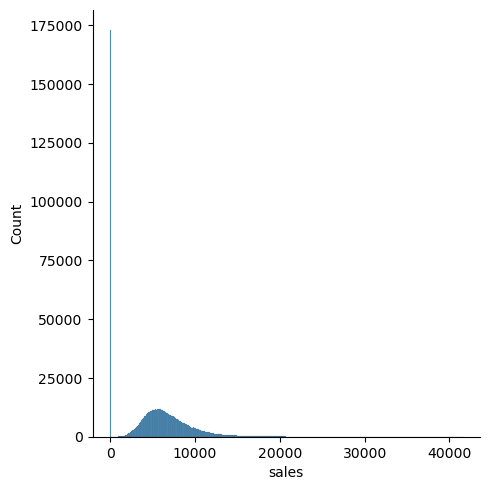

In [36]:
#Abaixo, ploto o gráfico do Sales original, porque o m que estou analistando 
# considera os zeros nas vendas também!
p = sns.displot ( df1['sales'] )
p.fig.set_dpi(100)
plt.show()

ANÁLISE SALES:

- Média e mediana bem próximas, não vai ter deslocamento da distribuição muito grande, vide skew.
- Skew 0.6 positivo (deslocamento leve para esquerda), mas bem próximo a zero, logo distribuição bem próxima de uma normal. 
- Kurtosis 1.77 positiva, próxima de 2, tem um pico grande.
- A média é de 5773 vendas/dia, e o std de 3850: Isto significa que em 78% dos dias (±1 std), temos entre 1923 (5773-3850) e 9.623 (5773+3850) vendas.

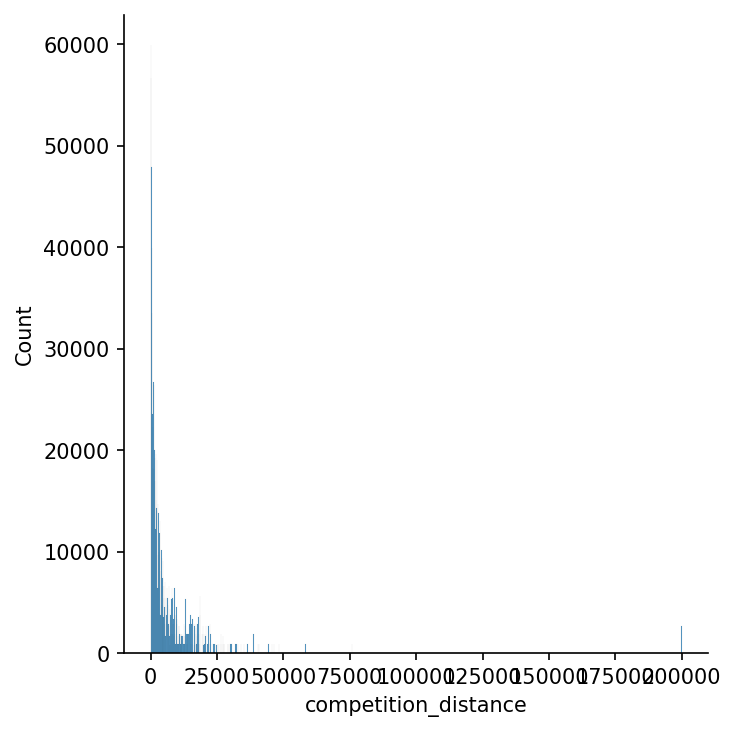

In [39]:
#Análise competition distance
p = sns.displot ( df1['competition_distance'] )
p.fig.set_dpi(150)
plt.show()

In [40]:
ANÁLISE COMPETITION DISTANDE:(apenas > 0):

- Média e mediana bem longe uma da outra, logo vai ter deslocamento da normal muito grande, 
vide skew.
- Skew 10.2 positiva (deslocamento enorme pra esquerda), indicando grande concentração de 
distâncias menores até os concorrentes.
- Kurtosis 147 positiva, indicando um pico gigantesco.

SyntaxError: invalid syntax (<ipython-input-40-642d74a923b1>, line 1)

In [41]:
#Análise customers
#Vou retirar customers = 0 pra analisar o gráfico mais limpo:

df_cust_pos = df1.loc[ df1['customers'] > 0 ]

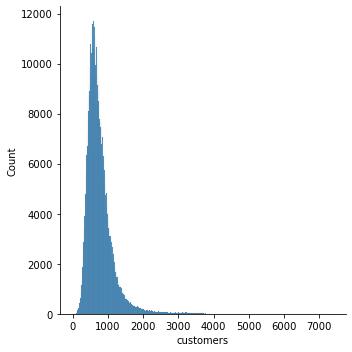

In [42]:
p = sns.displot ( df_cust_pos['customers'] )
#p.fig.set_dpi(150)
plt.show()

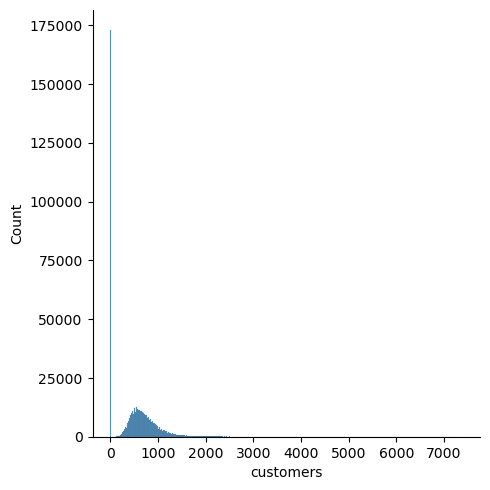

In [43]:
#Abaixo, ploto o gráfico do Customer original, porque o m que estou analistando 
# considera os zeros nos customers também!
p = sns.displot ( df1['customers'] )
p.fig.set_dpi(100)
plt.show()

ANÁLISE CUSTOMERS:

- Média (633) e mediana (609) próximas, mas mediana menor: deslocamento da curva levemente pra esquerda.

- Logo, skew levemente positiva, indicando maior concentração dos valores mais abaixo da média (ponto central).

- Kursosis de 7, logo pico muito alto /distribuição bem dispersa em número de clientes por dia.

- Std de 464, e média de clientes por dia de 633: em 78% dos dias (34% ref. 1 std positivo + 34% ref. 1 std negativo), tivemos entre 169 (633-464) e 1097 (633+464) clientes. 



In [44]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


### Categorical Attibures

In [45]:
cat_attributes.apply ( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

In [46]:
df1['state_holiday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: state_holiday, dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

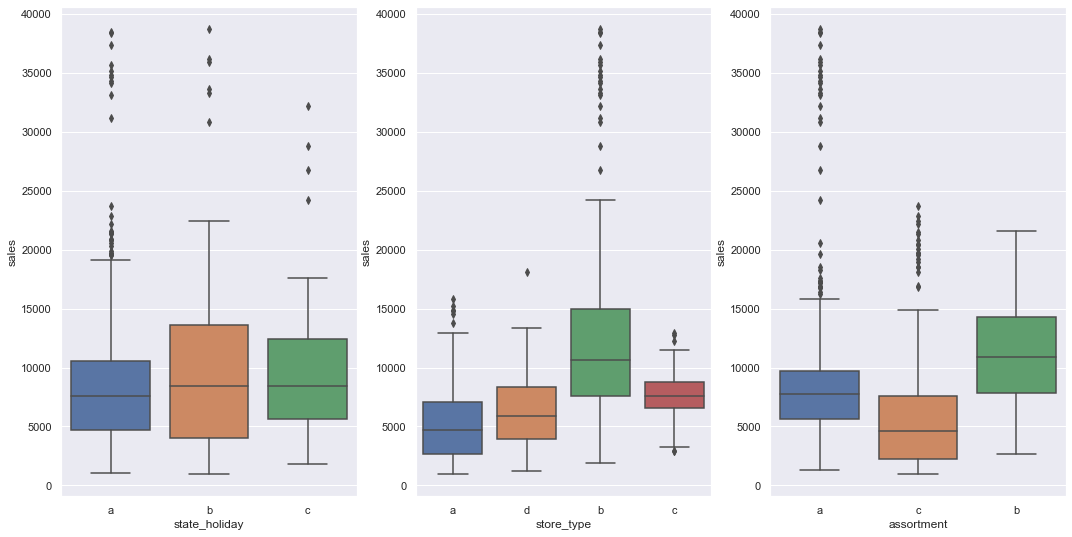

In [47]:
#Boxplot tem todas as medidas de dispersão e tendência central. Vamos usar ele.

#vendas nos feriados: remover dias não feriado e dias onde não teve vendas 
aux1 = df1[ (df1['state_holiday'] != '0') & (df1['sales'] > 0) ]

#setar tamanho:
sns.set(rc={'figure.figsize':(18,9)})

plt.subplot (1, 3, 1)
sns.boxplot( x='state_holiday', y='sales', data=aux1 )

plt.subplot (1, 3, 2)
sns.boxplot( x='store_type', y='sales', data=aux1 )

plt.subplot (1, 3, 3)
sns.boxplot( x='assortment', y='sales', data=aux1 )

Acima, a linha meio de cada imagem colorida é o 50º quartil, ou seja a mediana.
A borda da figura de baixo é o quartil 25, a de cima o 75.
Logo, dentro da imagem laranja, tenho o volume do quartil 25 ao 50, e do 50 ao 75. 
Fora da figura até os riscos superior e inferior é o valor mínimo e máximo.
Pontos após os riscos das bordas (valores máximos) são outliers: > 3 vezes o desvio padrão.

Logo, quanto mais achatada é a figura, maior a concentração em torno da mediana.

Análise do boxplot 1 - quantidade de vendas por tipo de feriado:
Legenda state_holiday: a = public holiday | b = Easter holiday |  c = Christmas

-A mediana de vendas de páscoa(b) e natal (c) é mais alta que de feriados publicos (a).
-A mediana de vendas de páscoa(b) e natal (c) é parecida, mas a dispersão é maior na páscoa.

Análise do boxplot 2 - quantidade de vendas por tipo de loja:
    Legenda de StoreType - differentiates between 4 different store models: a, b, c, d
        
-Loja tipo b vende muito mais na mediana que as demais, aprox. o dobro da tipo a.
-Loja do tipo c tem concentração de vendas maior em torno da mediana.


Análise do boxplot 3 - quantidade de vendas por mix de produtos:
    Legenda de Assortment - describes an assortment level: a = basic, b = extra, c = extended
        
-Há muito mais vendas do mix b do que dos demais. E o número de vendas varia mais também
neste mix.
-O mix A tem uma grande quantidade de outliers, mas uma distribuição bem uniforme fora isto.

# PASSO 2 - Feature Engeneering

In [49]:
df2 = df1.copy()

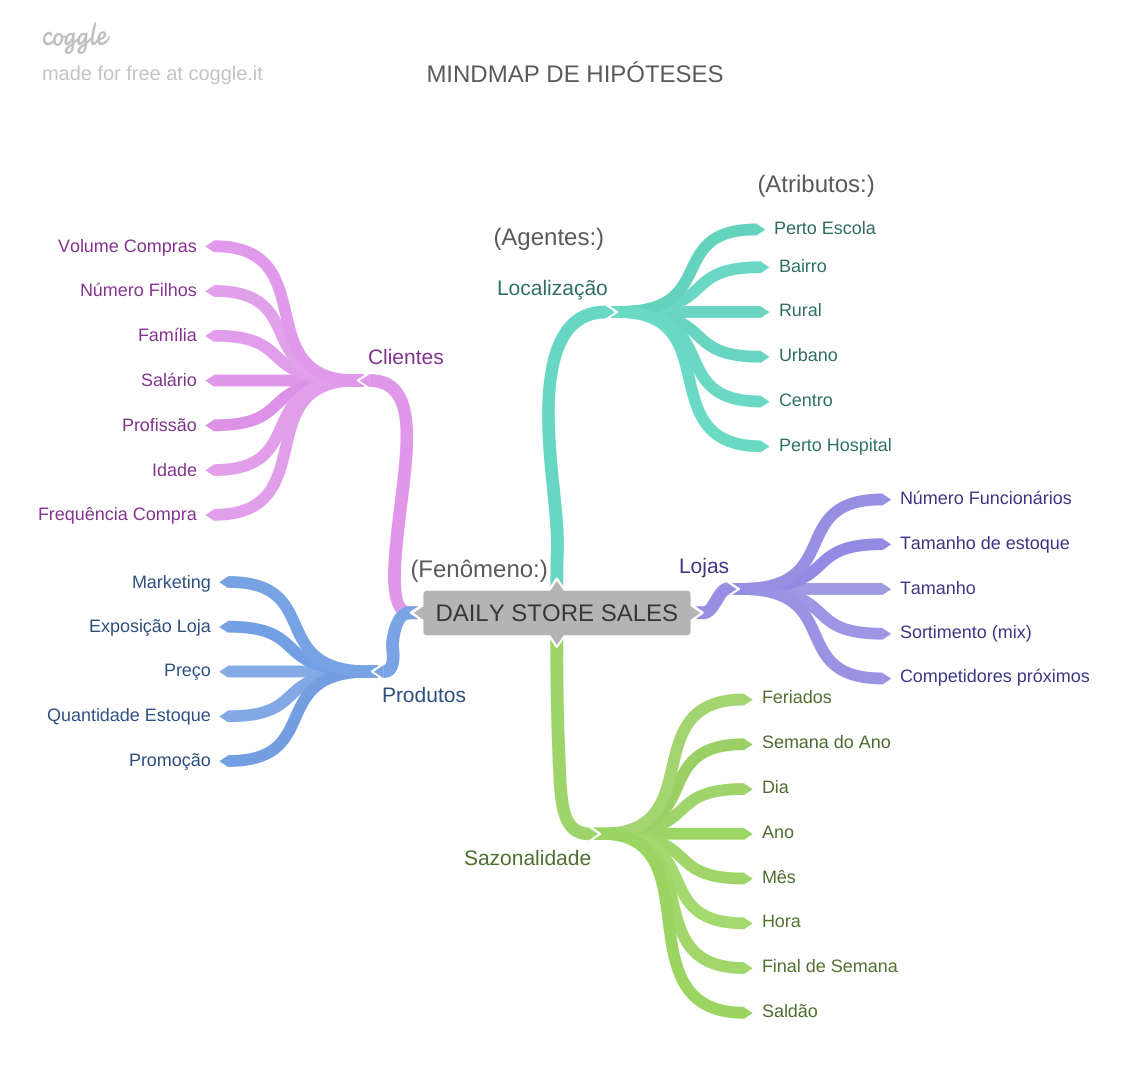

In [52]:
Image ('img/MindMapHypothesis.png')

## Criação das Hipóteses

Hipóteses são Apostas.

Exemplos nesse contexto são:
- Lojas de MAIOR porte (atributo) deveriam vender (fenômeno) MAIS.
- Lojas com MAIOR sortimento (atributo) deveriam vender (fenômeno) MAIS.
- Lojas com MAIS competidores por perto (atributo) deveriam vender (fenômeno) MENOS.

Vamos agora criar hipóteses olhando para o mapa, relacionando o fenômeno e cada agente 
 e seus atributos:
        Na prática, isto é capturado em reunião de brainstorm com o time de negócio.
        Deixar claro que são apostas, e não são relações de causa e efeito, mas correlações:
            Isto porque estamos mapeando todos os atributos correlacionados com vendas, 
            e não há um único.

### Hipóteses Loja

#### Lojas com maior quadro de funcionários deveriam vender mais.

#### Lojas com maior estoque deveriam vender mais.

#### Lojas com maior porte deveriam vender mais.

#### Lojas com maior sortimento deveriam vender mais.

#### Lojas com competidores mais próximos deveriam vender menos.


#### Lojas com competidores à mais tempo deveriam vender mais.

### Hipóteses Produto

#### Lojas que investem mais em marketing deveriam vender mais.

#### Lojas com maior exposição de produto nas vitrines deveriam vender mais.

#### Lojas com produtos de preço menor deveriam vender mais.

#### Lojas com promoções mais agressivas (descontos maiores), deveriam vender mais.

#### Lojas com promoções ativas por mais tempo deveriam vender mais.

#### Lojas com mais dias de promoção deveriam vender mais.

#### Lojas com mais promoções consecutivas deveriam vender mais.

### Hipóteses Sazonalidade

#### Lojas abertas duantes o feriado de natal deveriam vender mais.

#### Lojas deveriam vender mais ao longo dos anos.

#### Lojas deveriam vender no segundo semestre do ano.

#### Lojas deveriam vender mais no dia 10 de cada mês.

#### Lojas deveriam vender menos aos finais de semana.

#### Lojas deveriam vender menos durante os feriados escolares.

## Lista Final de Hipóteses (priorização)

Critério: tenho ou não o dado disponível agora?
    Se tenho, vou priorizar neste primeiro ciclo (listadas abaixo).
    Se não tenho, num ciclo futuro se necessário avalio coletar, conforme a performance do modelo.
    
   Cada hipótese vai gerar tabela, gráfico pra poder avaliar correlação com o fenômeno, como a força dessa correlação.

#### (H1 - loja) Lojas com maior sortimento deveriam vender mais.

#### (H2 - loja) Lojas com competidores mais próximos deveriam vender menos.


#### (H3 - loja) Lojas com competidores à mais tempo deveriam vender mais.

#### (H4 - prod) Lojas com promoções ativas por mais tempo deveriam vender mais.

#### (H5 - prod) Lojas com mais dias de promoção deveriam vender mais.

#### (H6 - prod) Lojas com mais promoções consecutivas deveriam vender mais.

#### (H7 - sazo) Lojas abertas duantes o feriado de natal deveriam vender mais.

#### (H8 - sazo) Lojas deveriam vender mais ao longo dos anos.

#### (H9 - sazo) Lojas deveriam vender no segundo semestre do ano.

#### (H10 - sazo) Lojas deveriam vender mais no dia 10 de cada mês.

#### (H11 - sazo) Lojas deveriam vender menos aos finais de semana.

#### (H12 - sazo) Lojas deveriam vender menos durante os feriados escolares.

## Feature Engeneering

Aqui, vou criar as variáveis que preciso derivar pra depois validar as hipóteses:

-year
-Month
-day
-week_of_year
-year_week

-competition_since - da data da compra, há quanto tempo tenho competidores
    juntar: competition_open_since_month + competition_open_since_year e pegar a diferença até date.

-promo_since - desde quando tenho a promoção ativa
    tenho promo2_since_week (semana do ano) e promo2_since_year, vou criar a partir deles
    
-assortment - trocar letras a b e c pelo mix de produtos
-state_holiday - trocar letras a b c pelo nome por extenso

In [53]:
df2.sample()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
887498,744,6,2013-04-27,8020,890,1,0,0,0,a,a,1370.0,12,2011,1,40,2014,"Jan,Apr,Jul,Oct",Apr,1


In [54]:
#year
df2['year'] = df2['date'].dt.year
#Month
df2['month'] = df2['date'].dt.month
#day
df2['day'] = df2['date'].dt.day
#week_of_year
df2['week_of_year'] = df2['date'].dt.weekofyear
#year_week
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )

<ipython-input-54-ab48e93f898e>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


In [55]:
#competition_since - da data da compra, há quanto tempo tenho competidores
    # juntar: competition_open_since_month + competition_open_since_year e pegar a diferença 
    # até date.
    
#criar um datetime contendo dia 1, e pegando o mês e ano:
df2['competition_since'] = df2.apply (lambda x: dt.datetime (year=x['competition_open_since_year'], 
                   month=x['competition_open_since_month'], day=1 ), axis=1)
#cria coluna em meses desde que a competição começou:  
df2['competition_time_month'] = ( (df2['date'] - df2['competition_since']) / 30 ).apply (lambda x: x.days).astype ( int )

In [56]:
#promo_since - desde quando tenho a promoção ativa
    #tenho promo2_since_week (semana do ano) e promo2_since_year (ano), 
    #vou criar a partir deles nova string concatenando ambas pra ficar assim:'2015-31':
df2['promo2_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )
    #agora, converter essa string em data: ('%Y-%W-$w') -> ano, semana do ano, inicia domingo.
df2['promo2_since'] = df2['promo2_since'].apply \
    ( lambda x: dt.datetime.strptime( x + '-1', '%Y-%W-%w' ) - dt.timedelta( days=7 ) )         
    #agora tendo as duas datas, subtrai venda - data de início da promoção, pra obter 
    #o tempo que a promoção ficou ativa ativa em semanas
df2['promo2_time_week'] = ( ( df2['date'] - df2['promo2_since'] ) / 7).apply \
                           ( lambda x: x.days ).astype (int)

In [57]:
#assortment - trocar letras a b e c pelo mix de produtos:
    #Assortment - describes an assortment level: a = basic, b = extra, c = extended
df2['assortment'] = df2['assortment'].apply ( lambda x: 
                               'basic' if x == 'a' else
                               'extra' if x == 'b' else 
                            'extended' if x == 'c' else x) 

In [58]:
df2['assortment'].value_counts()

basic       537445
extended    471470
extra         8294
Name: assortment, dtype: int64

In [59]:
#state_holiday - trocar letras a b c pelo nome por extenso
    #StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are 
    #closed on state holidays. Note that all schools are closed on public holidays and 
    #weekends. a = public holiday, b = easter_holiday, c = christmas, 0 = None
df2['state_holiday'] = df2['state_holiday'].apply ( lambda x: 
                                'public_holiday' if x == 'a' else
                                'easter_holiday' if x == 'b' else
                                     'christmas' if x == 'c' else 
                                   'regular_day' )

In [60]:
df2['state_holiday'].value_counts()

regular_day       986159
public_holiday     20260
easter_holiday      6690
christmas           4100
Name: state_holiday, dtype: int64

In [61]:
df2.sample(5).T

,986093,193606,476429,415389,269394
store,104,712,1110,280,350
day_of_week,1,7,4,2,3
date,2013-01-28 00:00:00,2015-02-08 00:00:00,2014-05-01 00:00:00,2014-06-24 00:00:00,2014-11-26 00:00:00
sales,8620,0,0,5339,7639
customers,1210,0,0,486,510
open,1,0,0,1,1
promo,0,0,1,0,1
state_holiday,regular_day,regular_day,public_holiday,regular_day,regular_day
school_holiday,0,0,0,0,0
store_type,a,a,c,d,d


In [63]:
#Save CSV:
df2.to_csv('notebooks/feature_eng_done.csv', index=False) #index=False if I have first columns as index, to avoid saving with the unnamed:0. Don't save the index, and won't have column unnamed:0 created nor problem to load it.
#no import needed, no message will appear.

# PASSO 3 -  Filtragem de Variáveis

In [64]:
df3 = df2.copy()

In [74]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo2_since,promo2_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,Jul,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## Filtragem das Linhas

'open' != 0 -> vamos remover linhas onde lojas estavam fechadas, pois é inútil p/ prever vendas
'sales' > 0 -> também quando não houve vendas

In [72]:
#remove as linhas acima e joga em df3
df3 = df3.loc[ (df3['open'] != 0) & (df3['sales'] > 0) ]

## Seleção das Colunas

'customers' -> não vamos utilizar, pois não temos como prever os clientes futuros, a menos que façamos um projeto a parte.

In [75]:
#dropo 'open' também, pois todas que ficaram são = 1
#dropo também 'promo_interval' porque já derivei variável dela, e 'month_map' pois foi 
    #uma var auxiliar
cols_drop = [ 'customers', 'open', 'promo_interval', 'month_map' ]

#axis=1 = colunas
df3.drop (cols_drop, axis=1)

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo2_since,promo2_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,0,public_holiday,1,b,basic,150.0,9,2006,0,1,2013,0,2013,1,1,1,2013-00,2006-09-01,77,2012-12-31,0
1016827,733,2,2013-01-01,10765,0,public_holiday,1,b,extra,860.0,10,1999,0,1,2013,0,2013,1,1,1,2013-00,1999-10-01,161,2012-12-31,0
1016863,769,2,2013-01-01,5035,0,public_holiday,1,b,extra,840.0,1,2013,1,48,2012,1,2013,1,1,1,2013-00,2013-01-01,0,2012-11-19,6
1017042,948,2,2013-01-01,4491,0,public_holiday,1,b,extra,1430.0,1,2013,0,1,2013,0,2013,1,1,1,2013-00,2013-01-01,0,2012-12-31,0


In [76]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval', 'month_map', 'is_promo', 'year',
       'month', 'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo2_since', 'promo2_time_week'],
      dtype='object')

In [ ]:
#Save CSV:
df3.to_csv('notebooks/variable_filtering_done.csv', index=False) #index=False if I have first columns as index, to avoid saving with the unnamed:0. Don't save the index, and won't have column unnamed:0 created nor problem to load it.
#no import needed, no message will appear.